In [2]:
import pandas as pd
import numpy as np
from pydataset import data
import env
from env import get_db_url
import data_wrangle

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


from sklearn.cluster import KMeans
from pydataset import data
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.

In [3]:
#
iris = data('iris')

In [4]:
# changing the period to _ for easier reading
new_col_names = []

for col in iris.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
iris.columns = new_col_names

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
# Choose features other than the ones used in the lesson.

X = iris[['sepal_width', 'sepal_length']]

X.head()

,sepal_width,sepal_length
1,3.5,5.1
2,3.0,4.9
3,3.2,4.7
4,3.1,4.6
5,3.6,5.0


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [8]:
iris['cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [9]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.76
virginica,6.588,2.974,5.552,2.026,1.30


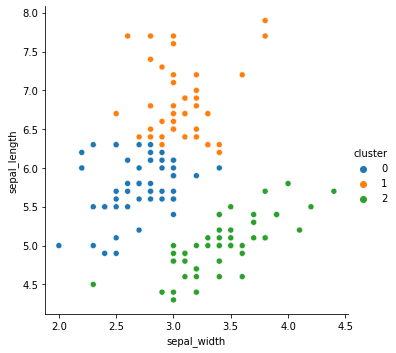

In [11]:
# Visualize the results of your clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue = 'cluster', palette = 'tab10')

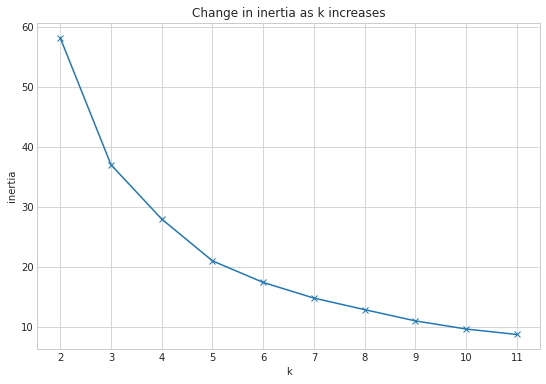

In [12]:
# Use the elbow method to visually select a good value for k.

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
X = iris[['sepal_length', 'petal_width', 'sepal_width']]
X.head()

,sepal_length,petal_width,sepal_width
1,5.1,0.2,3.5
2,4.9,0.2,3.0
3,4.7,0.2,3.2
4,4.6,0.2,3.1
5,5.0,0.2,3.6


In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [15]:
iris['cluster'] = clusters
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [17]:
import plotly.express as px

fig = px.scatter_3d(iris, x='sepal_length', y='petal_width', z='sepal_width',
              color='species')
fig.update_layout(width=400, height=400)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
fig.show()

Doing the same with Mall Data

In [19]:

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_db_url('mall_customers'))
    return df.set_index('customer_id')

In [20]:
df = get_mallcustomer_data()

In [22]:
data_wrangle.summarize(df)

----------------------
Dataframe head
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
----------------------
Dataframe Info 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
----------------------
Dataframe Description
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.26

In [23]:
df = data_wrangle.remove_outliers(df, 1.5, ['annual_income','spending_score', 'age'])

In [24]:
train, validate, test = data_wrangle.split_data(df)

In [25]:
X = train[['annual_income', 'spending_score']]

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1], dtype=int32)

In [27]:
train['cluster'] = clusters
train.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
183,Male,46,98,15,0
161,Female,56,79,35,0
198,Male,32,126,74,2
42,Male,24,38,92,1
133,Female,25,72,34,0


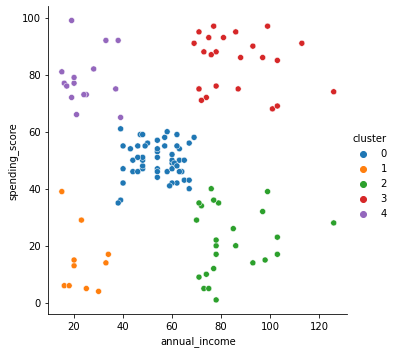

In [30]:
# Visualize the results of your clustering

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
sns.relplot(data=train, x='annual_income', y='spending_score', hue = 'cluster', palette = 'tab10')

In [3]:
scaled_trian, scaled_valid, scaled_test = data_wrangle.MinMax_Scaler(train, validate, test)

AttributeError: module 'data_wrangle' has no attribute 'MinMax_Scaler'